# Case Study 2: Financial Applications of Time Series
## Signal Frontier Analysis

Juhee Dalal

MSDS 7333: Quantifying the World, 2/9/17

## ABSTRACT

The purpose of this study is to utilize time series analysis (Signal Frontier Analysis) and analyze stock prices for the past 5 years across four major auto manufacturers. We then compare these with the Dow Jones Industrial price using a cross-sectional momentum (2). We utilize lookback and holding period for the portfolios selected over a certain time-frame, the momentum for each stock is calculated, ranked in descending order and standardized. The returns of the portfolio as well as weights were used to calculate the Sharpe ratio, which is an indicator of risk/return of the portfolios. Based on the results of the Sharpe ratios of the portfolios selected, returns are higher when portfolios are held between 35-65 days (holding period) with a 65-80 day lookback period.

**Keywords**: Finance, Time Series, Stock, Prices, Industrial Average, Cars, Ford, GM, Toyota, Tesla, Dow

## INTRODUCTION

With data readily available, businesses have the ability to analyze time series data to improve their business practices. Our time series analysis will take a look at the automotive industry over the past five years. Ford, General Motors and Toyota Motor Company give insight to historic companies of the automotive industry while Telsa Inc. provides insight of a new automotive company. Typically, when people think of the stock market they think of the Simple Market Price of a share in a particular company. Our analysis focuses on the Adjusted Close Price which can help give us an accurate representation of the firm's equity by accounting for actions such as stock splits, dividends and rights offerings.

This analysis hopes to identify trends/seasonality that may be associated with the Adjusted Closing Price of the Automotive Industry. Due to the nature of stock trading, our analysis may be able to detect trends (monthly or seasonal) between January 2012 and February 2017. Any trends this analysis may find could potentially lead to a better understanding of the cyclicality in the Automotive Industry.

## METHODS

### Descriptive Analysis

First, we are importing all the necessary packages and reading in the data from Yahoo Finance. The timeframe is 5 years from 2012 to 2017. The data contains stock prices for the past 5 years for Ford Motor Company, General Motors Company, Toyota Motor Corporation, Tesla Inc. and Dow Jones Industrial Average. The stock symbols for our chosen companies are GM, F, TM, TSLA and ^DJI. A sample of five records is printed below in Table 1. The data is stored as a dataframe called px.

In [3]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
import pandas.io.data as web

names = ['GM', '^DJI', 'F', 'TM', 'TSLA'] 
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = DataFrame({n: get_px(n, '1/1/2012', '2/4/2017') for n in names})

px.head(5)

,F,GM,TM,TSLA,^DJI
Date,,,,,
2012-01-03,9.114837,18.600183,66.764904,28.080000,12397.379883
2012-01-04,9.254057,18.688546,67.405171,27.709999,12418.419922
2012-01-05,9.491550,19.589837,67.592327,27.120001,12415.700195
2012-01-06,9.589824,20.252552,67.483974,26.910000,12359.919922
2012-01-09,9.663529,20.181862,67.395318,27.250000,12392.690430


*Table 1. Sample of Data Set*

In [4]:
px.describe()  

,F,GM,TM,TSLA,^DJI
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,12.333677,28.927314,109.611336,161.398033,16127.473738
std,1.973358,4.835521,18.005400,84.453935,2002.964074
min,7.398418,16.612040,66.627001,22.790001,12101.459961
25%,11.202240,26.186917,100.945230,44.340000,14659.559570
50%,12.784433,30.256297,114.784808,198.300003,16493.369141
75%,13.810845,32.331626,121.847426,226.889999,17760.410156
max,15.521020,38.279999,143.143648,286.040009,20100.910156


*Table 2. Descriptive Statistics*

The describe() function above gives us a brief summary of the data set at hand. Table 2 displays the summary. We have 1,281 entries for each - meaning our data set spans over 1,821 days. The mean prices for each company's stock price is also given, along with the standard deviation, min and max. Overall, it looks like Dow Jones and Tesla have the highest standard deviations, which indicates more variation in prices from the mean. This may be evident in our findings from the next section.

### Cumulative Returns

                   F        GM        TM      TSLA      ^DJI
Date                                                        
2012-01-03       NaN       NaN       NaN       NaN       NaN
2012-01-04  0.015274  0.004751  0.009590 -0.013177  0.001697
2012-01-05  0.025664  0.048227  0.002777 -0.021292 -0.000219
2012-01-06  0.010354  0.033830 -0.001603 -0.007743 -0.004493
2012-01-09  0.007686 -0.003490 -0.001314  0.012635  0.002651
                   F        GM        TM      TSLA      ^DJI
Date                                                        
2017-01-30 -0.009608 -0.018373 -0.005313 -0.009172 -0.006104
2017-01-31 -0.000808  0.007707 -0.002757  0.005187 -0.005360
2017-02-01 -0.003236 -0.012838 -0.004233 -0.010678  0.001352
2017-02-02 -0.003247 -0.011345 -0.006334  0.009268 -0.000303
2017-02-03  0.022801  0.016793  0.005152 -0.000875  0.009382


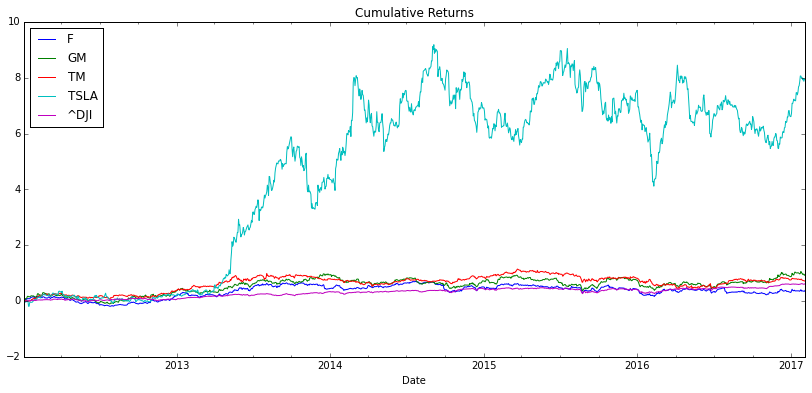

In [34]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
print rets.head(5)
print rets.tail(5)
pylab.rcParams['figure.figsize'] = (14.0, 6.0)
((1 + rets).cumprod() - 1).plot(title = 'Cumulative Returns')

*Table 3. Cumulative Returns by Stock Name*

In this section, we are filling in the missing values of the data frame defined in the previous section. Next, we are calculating the percent change over the given number of periods. Lastly, we are plotting the cumulative returns for each. The result is outputted in Table 3. From what we saw earlier from the brief summary of the data set, we are seeing evidence of a high standard deviation in the plot above for Dow Jones and Tesla Inc. Clearly, Telsa Inc. has a much higher cumulative return over time in comparison to the other four stocks we are tracking. Now, we will move on to testing different parameter values to find the optimal Sharpe ratios.

In [19]:
def calc_mom(prices, lookback, lag):
    mom_ret = prices.shift(lag).pct_change(lookback) 
    ranks = mom_ret.rank(axis=1, ascending=False) 
    demeaned = ranks - ranks.mean(axis=1)
    return demeaned / demeaned.std(axis=1)

In [20]:
compound = lambda x : (1 + x).prod() - 1 
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
# Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)
    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first') 
    returns = daily_rets.resample(freq, how=compound) 
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

The above section contains a function called calc_mom. This function takes in prices, lookback and lag as variables. The momentum is calculated over a certain lookback period. Then the data will be ranked in descending order and standardized. Next, we have a function called strat_sr which takes in the values of price (stock price), lb (lookback)and hold (holding period). The holding period is the number of days between trading. The function returns the overall Sharpe ratio. A quick example of this is given below. 

In [21]:
strat_sr(px, 70, 30)

0.077602268377752845

## RESULTS

This next section creates a dataframe of the results from evaluating the strat_sr function over a grid of parameters. A range from 20 - 90 with increments of 5 is given for lookbacks. The same range is given for holdings. We want to be able to test a larger set of parameters and display the results in a concise manner. This is what is occuring in the code block below. The strat_sr function computs the Sharpe Ratios for each holding and lookback period. This will be used in the next section to determine the optimal number.

In [22]:
from collections import defaultdict
lookbacks = range(20, 90, 5) 
holdings = range(20, 90, 5) 
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)
    ddf = DataFrame(dd)
    ddf.index.name = 'Holding Period' 
    ddf.columns.name = 'Lookback Period'

In [31]:
def heatmap(df, cmap=plt.cm.Greens):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest') 
    ax.set_xlabel(df.columns.name) 
    ax.set_xticks(np.arange(len(df.columns))) 
    ax.set_xticklabels(list(df.columns)) 
    ax.set_ylabel(df.index.name) 
    ax.set_yticks(np.arange(len(df.index))) 
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

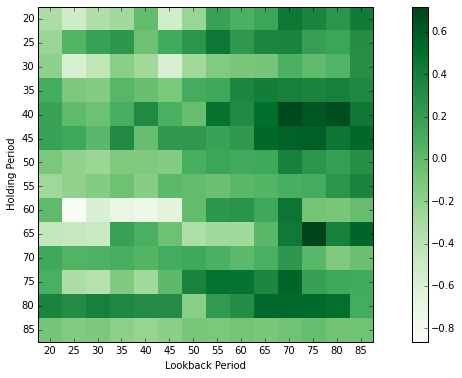

In [32]:
heatmap(ddf)

*Table 4. Heatmap of Sharpe Ratio Over Various Lookbacks and Holding Periods*

Table 4 shows the final heatmap of the Sharpe Ratios over the various parameter values. Notice that the darker green indicates a higher Sharpe ratio, which is better - we want to have a higher risk-adjusted return. The higher the Sharpe ratio, the better the company's returns are relative to the risk that it has incurred over the years (3). The standard deviation is taken into account to calculate the Sharpe Ratio. Notice that some of the darkest greens we see are between a 35-65 day holding period along with a 65-80 day lookback period. Another optimal set of combinations is having a holding period of 80 days ad essentially any number of lookback days (20-85), with the exception of 50 days. However, the combination that yields the highest Sharpe Ratio or risk-adjusted return is a 65 day holding period and 75 day lookback period. 


## CONCLUSION

The Signal Frontier Analysis was used to create a cross-sectional momentum portfolio and in this example we used a heat map to help determine the parameters; holding and lookback period. In layman's terms we are trying to create a model that can predict future stock performance based on a set past performance. In this example the model was built from four auto companies and an index fund. Then different variations of the model were run based on a wide range of parameters. The generated heat map was used to determine which set of parameters would be best for the model. Looking at the graph it is clear the model is most efficient at a lookback period of 75 days and a holding period of 65 days for this data. Once again, this model is using past performance and patterns to predict future prices. It is not a magic eight ball in which everything that comes out as infallible truth but it is a good tool for predicting future stock prices under normal conditions. 

## REFERENCES

1. McKinney, W. (2013). Python for data analysis. Sebastopol, CA: O'Reilly.
2. Confirmed Errata | O'Reilly Media. (n.d.) Retrieved February 06, 2017, from
    http://www.oreilly.com/catalog/errata.csp?isbn=0636920023784
3. Staff, I. (2015, July 24). Adjusted Closing Price. Retrieved February 08, 2017, from http://www.investopedia.com/terms/a/adjusted_closing_price.asp
4. The Sharpe Ratio Defined. (n.d.). Retrieved February 08, 2017, from http://www.investopedia.com/terms/a/adjusted_closing_price.asp